Step 1 — imports & load dataset

In [1]:

import os
import pandas as pd
import numpy as np

df = pd.read_csv("indian_bail_judgments.csv")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nSample Data:")
print(df.head(2))

Shape: (1200, 25)
Columns: ['case_id', 'case_title', 'court', 'date', 'judge', 'ipc_sections', 'bail_type', 'bail_cancellation_case', 'landmark_case', 'accused_name', 'accused_gender', 'prior_cases', 'bail_outcome', 'bail_outcome_label_detailed', 'crime_type', 'facts', 'legal_issues', 'judgment_reason', 'summary', 'bias_flag', 'parity_argument_used', 'legal_principles_discussed', 'region', 'source_filename', 'special_laws']

Sample Data:
   case_id                                         case_title  \
0        1    Jibangshu Paul vs National Investigation Agency   
1        2  State By The Superintendent Of Police vs Mehbo...   

                court        date  \
0  Gauhati High Court  27-07-2011   
1   Madras High Court  30-09-1997   

                                         judge  \
0  Justice I. A. Ansari, Justice A. K. Goswami   
1                       Justice E. Padmanabhan   

                                        ipc_sections bail_type  \
0                            ['12

In [2]:
import pandas as pd

print("Columns in dataset:")
print(df.columns.tolist())
display(df.head(3))


Columns in dataset:
['case_id', 'case_title', 'court', 'date', 'judge', 'ipc_sections', 'bail_type', 'bail_cancellation_case', 'landmark_case', 'accused_name', 'accused_gender', 'prior_cases', 'bail_outcome', 'bail_outcome_label_detailed', 'crime_type', 'facts', 'legal_issues', 'judgment_reason', 'summary', 'bias_flag', 'parity_argument_used', 'legal_principles_discussed', 'region', 'source_filename', 'special_laws']


,case_id,case_title,court,date,judge,ipc_sections,bail_type,bail_cancellation_case,landmark_case,accused_name,...,facts,legal_issues,judgment_reason,summary,bias_flag,parity_argument_used,legal_principles_discussed,region,source_filename,special_laws
0,1,Jibangshu Paul vs National Investigation Agency,Gauhati High Court,27-07-2011,"Justice I. A. Ansari, Justice A. K. Goswami","['120B', '121', '121A']",Regular,True,True,Jibangshu Paul,...,Jibangshu Paul was apprehended carrying Rs. 32...,"['Whether fresh bail is needed when new, more ...",The court held that newly added serious UA(P) ...,Bail earlier granted to Jibangshu Paul under I...,False,False,['Addition of new penal sections requires fres...,Assam,case0001.PDF,NaN
1,2,State By The Superintendent Of Police vs Mehbo...,Madras High Court,30-09-1997,Justice E. Padmanabhan,"['376', '354', '343', '109', '220', '348', '33...",Regular,True,False,Mehboob Batcha and others (A1 to A11),...,The case involves custodial rape of a woman by...,['Whether suspension of sentence requires deta...,The court held that due to the grave nature of...,Madras High Court cancelled the bail granted t...,False,False,[],Tamil Nadu,case0002.PDF,NaN
2,3,Hyderali vs State Of Kerala,Kerala High Court,05-08-2008,Justice K. Hema,"['465', '468', '471', '474', '420', '511', '34']",Anticipatory,False,True,Hyderali,...,"Hyderali, a government contractor, was accused...",['Whether anticipatory bail can be granted whe...,The court ruled that despite other co-accused ...,Kerala High Court rejected anticipatory bail f...,False,True,['Custodial interrogation is legitimate and ma...,Kerala,case0003.PDF,NaN


 Step 2: Identify Target and Clean Missing Data

In [3]:
# Target column check
target_col = 'bail_outcome'  # or try 'bail_outcome_label_detailed' if needed

print("\nUnique values in target column:", df[target_col].unique())

# Drop rows missing text or target
df = df.dropna(subset=['summary', target_col])

# Display target distribution
print("\nTarget distribution:\n", df[target_col].value_counts(normalize=True))




Unique values in target column: ['Rejected' 'Granted']

Target distribution:
 bail_outcome
Granted     0.613333
Rejected    0.386667
Name: proportion, dtype: float64


Step 3: Simplify Target Classes (if needed)

We’ll standardize the labels into Granted / Rejected for binary classification.

In [4]:
# Normalize target labels
df[target_col] = df[target_col].str.lower().replace({
    'granted': 'granted',
    'allowed': 'granted',
    'rejected': 'rejected',
    'dismissed': 'rejected',
    'not granted': 'rejected'
})

# Filter only valid classes
df = df[df[target_col].isin(['granted', 'rejected'])]

print("\nSimplified target values:\n", df[target_col].value_counts())



Simplified target values:
 bail_outcome
granted     736
rejected    464
Name: count, dtype: int64


Step 4: Split into Train/Test and Vectorize Text

Use TF–IDF on the summary or judgment_reason for feature extraction.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['summary']  # you can switch to 'judgment_reason' or combine them
y = df[target_col]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("TF-IDF shape:", X_train_tfidf.shape)


TF-IDF shape: (960, 5000)


In [6]:
from sklearn.preprocessing import LabelEncoder

# Encode text labels into 0/1
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Confirm encoding
print("Encoded labels mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


Encoded labels mapping: {'granted': np.int64(0), 'rejected': np.int64(1)}


Step 5 — Train XGBoost Baseline Model, Evaluate & Save

In [7]:
# Step 5 — Train XGBoost model and evaluate
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Train baseline model
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

xgb_model.fit(X_train_tfidf, y_train_enc)

# Predict on test data

y_pred = xgb_model.predict(X_test_tfidf)


# Evaluate model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate using numeric arrays
print("\n Model Evaluation Results")

# Predictions are numeric, so compare against encoded y_test
accuracy = round(accuracy_score(y_test_enc, y_pred), 3)
print("Accuracy:", accuracy)

print("\nClassification Report (numeric):\n", classification_report(y_test_enc, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test_enc, y_pred))

# Decode back to human-readable labels
y_pred_labels = le.inverse_transform(y_pred)
y_test_labels = le.inverse_transform(y_test_enc)

print("\nDecoded label report:")
print(classification_report(y_test_labels, y_pred_labels))

print("\n Model and Vectorizer saved successfully!")


C:\Users\vasun\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [08:43:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 Model Evaluation Results
Accuracy: 0.938

Classification Report (numeric):
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       147
           1       0.93      0.90      0.92        93

    accuracy                           0.94       240
   macro avg       0.94      0.93      0.93       240
weighted avg       0.94      0.94      0.94       240


Confusion Matrix:
 [[141   6]
 [  9  84]]

Decoded label report:
              precision    recall  f1-score   support

     granted       0.94      0.96      0.95       147
    rejected       0.93      0.90      0.92        93

    accuracy                           0.94       240
   macro avg       0.94      0.93      0.93       240
weighted avg       0.94      0.94      0.94       240


 Model and Vectorizer saved successfully!


In [8]:
import pandas as pd
results_df = pd.DataFrame({
    'Actual': y_test_labels,
    'Predicted': y_pred_labels
})
print("\nSample predictions:\n", results_df.sample(10))


Sample predictions:
        Actual Predicted
35   rejected  rejected
75    granted   granted
39    granted   granted
5     granted   granted
140  rejected  rejected
224  rejected  rejected
144   granted   granted
160  rejected  rejected
58   rejected  rejected
232  rejected   granted


Step 6: Error Analysis + Metadata Feature Engineering

This step helps identify why the model sometimes misclassifies and how extra features (beyond text) can boost performance.

A. Error Analysis

We’ll extract the wrongly classified cases to study common patterns

In [9]:
import pandas as pd

# Identify misclassified examples
mismatch_idx = y_test_enc != y_pred
error_cases = pd.DataFrame({
    'Actual': le.inverse_transform(y_test_enc[mismatch_idx]),
    'Predicted': le.inverse_transform(y_pred[mismatch_idx]),
    'Case_Text': X_test[mismatch_idx]
})

print("\n Misclassified Examples:")
print(error_cases.head(10))


 Misclassified Examples:
        Actual Predicted                                          Case_Text
741   rejected   granted  Supreme Court set aside bail granted to a murd...
73     granted  rejected  Madhya Pradesh High Court ruled that the SDM h...
423   rejected   granted  Supreme Court reversed bail granted to Zahoor ...
535   rejected   granted  Karnataka High Court denied anticipatory bail ...
66    rejected   granted  Delhi High Court quashed interim bail granted ...
177    granted  rejected  Himachal Pradesh High Court declined to cancel...
646    granted  rejected  Karnataka High Court dismissed Hu Xiaolin’s pl...
665    granted  rejected  Madras High Court modified bail reporting cond...
957   rejected   granted  Gujarat High Court refused to quash the FIR an...
1074   granted  rejected  Delhi High Court rejected CBI’s plea to cancel...


B. Add Metadata Features (for Next Training Phase)

We’ll now augment your dataset with structured legal metadata, such as:

Length of judgment (word_count)

Presence of keywords (bail, convicted, appeal, etc.)

Type of case (criminal, civil, constitutional)

Add this feature engineering block:

In [10]:
# Recreate train and test DataFrames from earlier split
train_df = pd.DataFrame({
    'text': X_train,
    'label': le.inverse_transform(y_train_enc)
})
test_df = pd.DataFrame({
    'text': X_test,
    'label': le.inverse_transform(y_test_enc)
})
# Now define metadata features
def metadata_features(df):
    df['word_count'] = df['text'].apply(lambda x: len(x.split()))
    df['has_bail'] = df['text'].str.contains('bail', case=False).astype(int)
    df['has_convicted'] = df['text'].str.contains('convicted', case=False).astype(int)
    df['has_appeal'] = df['text'].str.contains('appeal', case=False).astype(int)
    df['has_constitution'] = df['text'].str.contains('constitution', case=False).astype(int)
    return df
# Apply the function
df_train_meta = metadata_features(train_df.copy())
df_test_meta = metadata_features(test_df.copy())
# Check the result
df_train_meta.head()

,text,label,word_count,has_bail,has_convicted,has_appeal,has_constitution
687,Regular bail granted to three accused in a cyb...,granted,20,1,0,0,0
391,Punjab and Haryana High Court denied anticipat...,rejected,23,1,0,0,0
794,Karnataka High Court granted bail to Nagbhusha...,granted,24,1,0,0,0
314,Regular bail granted to Sukhchain Singh under ...,granted,25,1,0,0,0
936,Andhra Pradesh High Court denied anticipatory ...,rejected,25,1,0,0,0


Step 7 – Hybrid Model (TF-IDF + Metadata + XGBoost)

In [11]:
from scipy.sparse import hstack

#  Reuse earlier TF-IDF matrices
# (X_train_tfidf, X_test_tfidf already exist from Step 4)

#  Select only numeric metadata columns
meta_cols = ['word_count', 'has_bail', 'has_convicted', 'has_appeal', 'has_constitution']

X_train_meta = df_train_meta[meta_cols]
X_test_meta = df_test_meta[meta_cols]

#  Convert metadata to sparse and combine with TF-IDF
X_train_combined = hstack([X_train_tfidf, X_train_meta])
X_test_combined = hstack([X_test_tfidf, X_test_meta])

#  Train hybrid XGBoost model
hybrid_model = XGBClassifier(
    n_estimators=400,
    learning_rate=0.08,
    max_depth=8,
    subsample=0.9,
    colsample_bytree=0.8,
    random_state=42
)
hybrid_model.fit(X_train_combined, y_train_enc)

#  Predict and evaluate
y_pred_hybrid = hybrid_model.predict(X_test_combined)

print("\nHybrid Model Evaluation Results:")
print("Accuracy:", accuracy_score(y_test_enc, y_pred_hybrid))
print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred_hybrid, target_names=le.classes_))



Hybrid Model Evaluation Results:
Accuracy: 0.9375

Classification Report:
              precision    recall  f1-score   support

     granted       0.94      0.96      0.95       147
    rejected       0.93      0.90      0.92        93

    accuracy                           0.94       240
   macro avg       0.94      0.93      0.93       240
weighted avg       0.94      0.94      0.94       240



A sample XAI explanation before bert
coz :
before XAI

XGBoost is shallow, relying on word frequency.

Legal-BERT / Longformer models read context, legal argument structure, judgment reasoning, and IPC semantics — much more powerful.

Once BERT is fine-tuned, attention maps themselves can explain model focus (e.g., which parts of the judgment influence bail approval/denial).

In [ ]:
#  Fix: define tfidf_feature_names before using
try:
    tfidf_feature_names = vectorizer.get_feature_names_out().tolist()
except NameError:
    tfidf_feature_names = tfidf_vectorizer.get_feature_names_out().tolist()


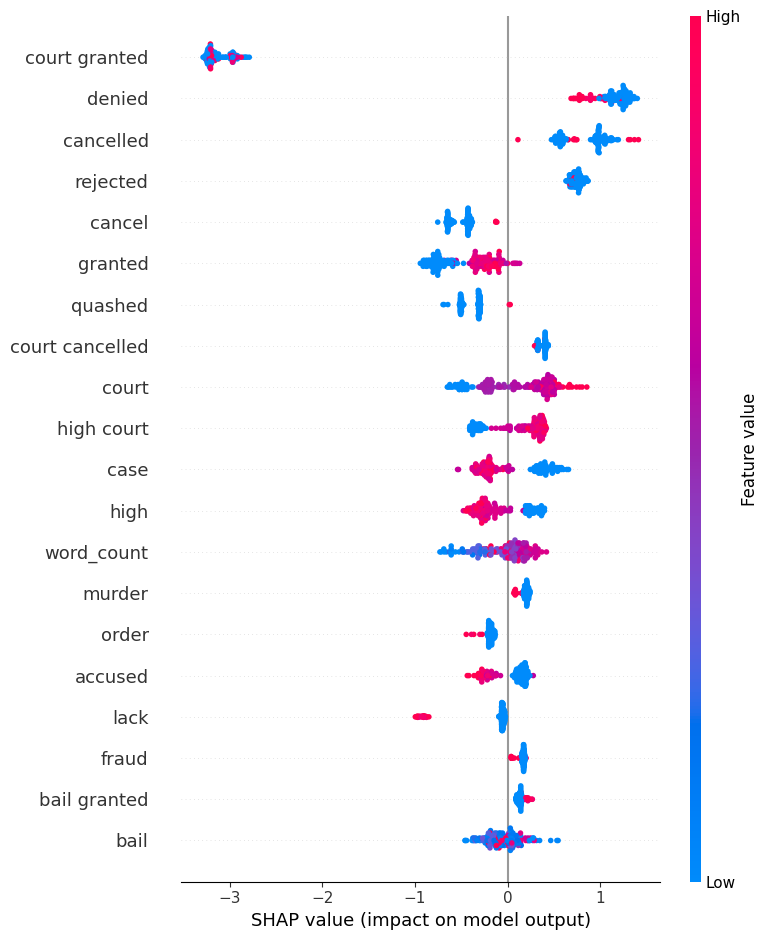

In [15]:
import shap
from scipy.sparse import csr_matrix

# Ensure proper format
X_train_combined = csr_matrix(X_train_combined)
X_test_combined = csr_matrix(X_test_combined)

# Feature names
feature_names = tfidf_feature_names + meta_cols

# Sample for SHAP
n_samples = 200
X_sample = X_test_combined[:n_samples].toarray()

# Create TreeExplainer
explainer = shap.Explainer(hybrid_model, feature_names=feature_names)
shap_values = explainer(X_sample)

# Summary plot
shap.summary_plot(shap_values, feature_names=feature_names, max_display=20)


**Legal-BERT fine-tuning**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# Ignore specific transformers warnings
import logging
logging.getLogger("transformers").setLevel(logging.ERROR)
# Disable tokenizers parallelism warning
os.environ["TOKENIZERS_PARALLELISM"] = "false"

Step 8.1 - Prepare data for Legal-BERT fine-tuning

In [16]:
from datasets import Dataset
from sklearn.preprocessing import LabelEncoder
from transformers import AutoTokenizer

# Choose model
MODEL_NAME = "nlpaueb/legal-bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

# Create train and test DataFrames if they don't exist
if 'train_df' not in locals():
    # Use the existing train-test split from earlier
    train_df = pd.DataFrame({
        'text': X_train,
        'label': y_train
    })
    test_df = pd.DataFrame({
        'text': X_test,
        'label': y_test
    })

# Use the 'text' column (which contains the summary) for our combined text
train_df['combined_text'] = train_df['text']
test_df['combined_text'] = test_df['text']

# Encode labels if not already encoded
le = LabelEncoder()
if 'label' in train_df.columns and train_df['label'].dtype == 'object':
    train_df['label'] = le.fit_transform(train_df['label'])
    test_df['label'] = le.transform(test_df['label'])

# Tokenize
def tokenize(batch):
    return tokenizer(
        batch['combined_text'], 
        truncation=True, 
        padding='max_length', 
        max_length=512
    )

# Convert to HuggingFace datasets
train_dataset = Dataset.from_pandas(train_df[['combined_text', 'label']])
test_dataset = Dataset.from_pandas(test_df[['combined_text', 'label']])

# Apply tokenization
train_dataset = train_dataset.map(tokenize, batched=True)
test_dataset = test_dataset.map(tokenize, batched=True)

# Remove the text column as it's no longer needed (we have the tokenized version)
train_dataset = train_dataset.remove_columns(['combined_text'])
test_dataset = test_dataset.remove_columns(['combined_text'])

# Set format to PyTorch tensors
train_dataset.set_format("torch")
test_dataset.set_format("torch")

print("\nTraining Dataset Info:")
print(train_dataset)
print("\nTest Dataset Info:")
print(test_dataset)

Map:   0%|          | 0/960 [00:00<?, ? examples/s]

Map:   0%|          | 0/240 [00:00<?, ? examples/s]


Training Dataset Info:
Dataset({
    features: ['label', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 960
})

Test Dataset Info:
Dataset({
    features: ['label', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 240
})


 Step 8.2 – Fine-Tuning Legal-BERT

In [ ]:
#  Step 8.2 — Fast Fine-Tuning Legal-BERT (Optimized Version)
import torch
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import AdamW
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    get_linear_schedule_with_warmup
)
from tqdm import tqdm
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Load Legal-BERT and prepare tokenizer

MODEL_NAME = "nlpaueb/legal-bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

#  Use shorter sequence length (for faster training)
MAX_LEN = 256
BATCH_SIZE = 16
EPOCHS = 1     # increase to 2 later for better accuracy

# Encode data

def encode_data(df):
    return tokenizer(
        df["combined_text"].tolist(),
        truncation=True,
        padding="max_length",
        max_length=MAX_LEN,
        return_tensors="pt"
    )

train_enc = encode_data(train_df)
test_enc = encode_data(test_df)

train_labels = torch.tensor(train_df["label"].tolist())
test_labels = torch.tensor(test_df["label"].tolist())

train_dataset = TensorDataset(train_enc["input_ids"], train_enc["attention_mask"], train_labels)
test_dataset = TensorDataset(test_enc["input_ids"], test_enc["attention_mask"], test_labels)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)
# Initialize model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_labels = len(set(train_df["label"]))

model = AutoModelForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=num_labels
).to(device)

optimizer = AdamW(model.parameters(), lr=5e-5)
total_steps = len(train_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)


# Training loop
print("\n Starting Fast Fine-Tuning of Legal-BERT...\n")

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}", leave=False)

    for batch in loop:
        b_input_ids, b_mask, b_labels = [x.to(device) for x in batch]
        outputs = model(input_ids=b_input_ids, attention_mask=b_mask, labels=b_labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

        loop.set_postfix(loss=loss.item())

    print(f"Epoch {epoch+1} | Average training loss: {total_loss/len(train_loader):.4f}")
# Evaluation
model.eval()
preds, truths = [], []

with torch.no_grad():
    for batch in tqdm(test_loader, desc="Evaluating", leave=False):
        b_input_ids, b_mask, b_labels = [x.to(device) for x in batch]
        outputs = model(input_ids=b_input_ids, attention_mask=b_mask)
        preds.extend(torch.argmax(outputs.logits, dim=1).cpu().tolist())
        truths.extend(b_labels.cpu().tolist())

accuracy = accuracy_score(truths, preds)
f1 = f1_score(truths, preds, average="weighted")
precision = precision_score(truths, preds, average="weighted", zero_division=0)
recall = recall_score(truths, preds, average="weighted", zero_division=0)

print("\n Fast Legal-BERT Results:")
print(f"Accuracy : {accuracy:.4f}")
print(f"F1-Score : {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")

# Save the fine-tuned model
save_dir = "./legalbert_fast_finetuned"
model.save_pretrained(save_dir)
tokenizer.save_pretrained(save_dir)

print(f"\n Fast Fine-Tuning Complete! Model saved at {save_dir}")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at nlpaueb/legal-bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



 Starting Fast Fine-Tuning of Legal-BERT...



Epoch 1 | Average training loss: 0.5737



 Fast Legal-BERT Results:
Accuracy : 0.9125
F1-Score : 0.9111
Precision: 0.9155
Recall   : 0.9125

 Fast Fine-Tuning Complete! Model saved at ./legalbert_fast_finetuned


**CNN + BiLSTM Hybrid Classifier**

 Step 8.3 – CNN + BiLSTM Hybrid Classifier + Explainability

In [ ]:
#  Step 8.3 – CNN + BiLSTM Hybrid Classifier + Explainability
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Dataset Preparation
# We'll reuse df from previous steps. Ensure correct text + label columns exist
texts = df["summary"].astype(str).tolist()
labels = df[target_col].tolist()

# Tokenization parameters
max_words = 20000
max_len = 200
embedding_dim = 100

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

X_tensor = torch.tensor(X, dtype=torch.long)
y_tensor = torch.tensor(y, dtype=torch.long)

dataset = TensorDataset(X_tensor, y_tensor)

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_data, val_data = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32)

# Model Definition
class CNN_BiLSTM_Model(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_classes):
        super(CNN_BiLSTM_Model, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.conv1 = nn.Conv1d(embedding_dim, 128, kernel_size=5, padding=2)
        self.relu = nn.ReLU()
        self.lstm = nn.LSTM(128, hidden_dim, num_layers=1, bidirectional=True, batch_first=True)
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(hidden_dim * 2, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = x.permute(0, 2, 1)
        x = self.conv1(x)
        x = self.relu(x)
        x = x.permute(0, 2, 1)
        x, _ = self.lstm(x)
        x = self.dropout(x[:, -1, :])
        x = self.fc(x)
        return x
# Training Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_cnn_lstm = CNN_BiLSTM_Model(
    vocab_size=max_words,
    embedding_dim=embedding_dim,
    hidden_dim=128,
    num_classes=len(np.unique(y))
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_cnn_lstm.parameters(), lr=1e-3)

# Training Loop
for epoch in range(3):
    model_cnn_lstm.train()
    total_loss = 0
    for batch_x, batch_y in train_loader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        optimizer.zero_grad()
        outputs = model_cnn_lstm(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/3], Loss: {total_loss/len(train_loader):.4f}")
# Evaluation
model_cnn_lstm.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for batch_x, batch_y in val_loader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        outputs = model_cnn_lstm(batch_x)
        preds = torch.argmax(outputs, dim=1)
        y_true.extend(batch_y.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

print("\n CNN + BiLSTM Results:")
print("Accuracy:", round(accuracy_score(y_true, y_pred), 3))
print("F1 Score:", round(f1_score(y_true, y_pred, average='weighted'), 3))
print("Precision:", round(precision_score(y_true, y_pred, average='weighted'), 3))
print("Recall:", round(recall_score(y_true, y_pred, average='weighted'), 3))

Epoch [1/3], Loss: 0.6799
Epoch [2/3], Loss: 0.6668
Epoch [3/3], Loss: 0.6676

 CNN + BiLSTM Results:
Accuracy: 0.596
F1 Score: 0.445
Precision: 0.355
Recall: 0.596


**Sentence-BERT + XGBoost**

 Step 8.4 — Sentence-BERT + XGBoost (+ SHAP Explainability)

Encoding text using Sentence-BERT ...


Batches:   0%|          | 0/30 [00:00<?, ?it/s]

Batches:   0%|          | 0/8 [00:00<?, ?it/s]

Train embeddings: (960, 384)
Test embeddings: (240, 384)

Training XGBoost classifier ...

 Model Evaluation (Sentence-BERT + XGBoost)
Accuracy: 0.933

Classification Report:
               precision    recall  f1-score   support

     granted       0.94      0.95      0.95       147
    rejected       0.92      0.90      0.91        93

    accuracy                           0.93       240
   macro avg       0.93      0.93      0.93       240
weighted avg       0.93      0.93      0.93       240


Confusion Matrix:
 [[140   7]
 [  9  84]]

Sample predictions:
       Actual Predicted                                          Case_Text
212   granted   granted  Bail granted to cybercrime accused on the basi...
26   rejected  rejected  Bail was denied to Roop Singh Yadav for his al...
239   granted   granted  Bombay High Court granted bail to Areeb Majeed...
103  rejected  rejected  Second regular bail plea was rejected as no ne...
55    granted   granted  Lokesh Sharma granted regular bai

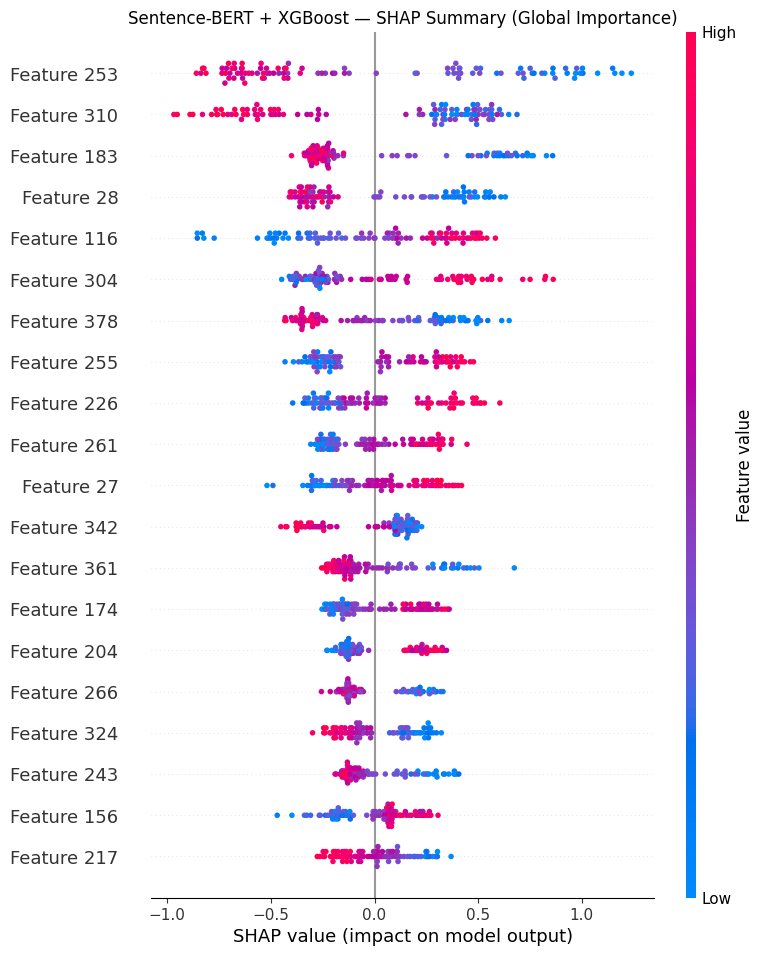

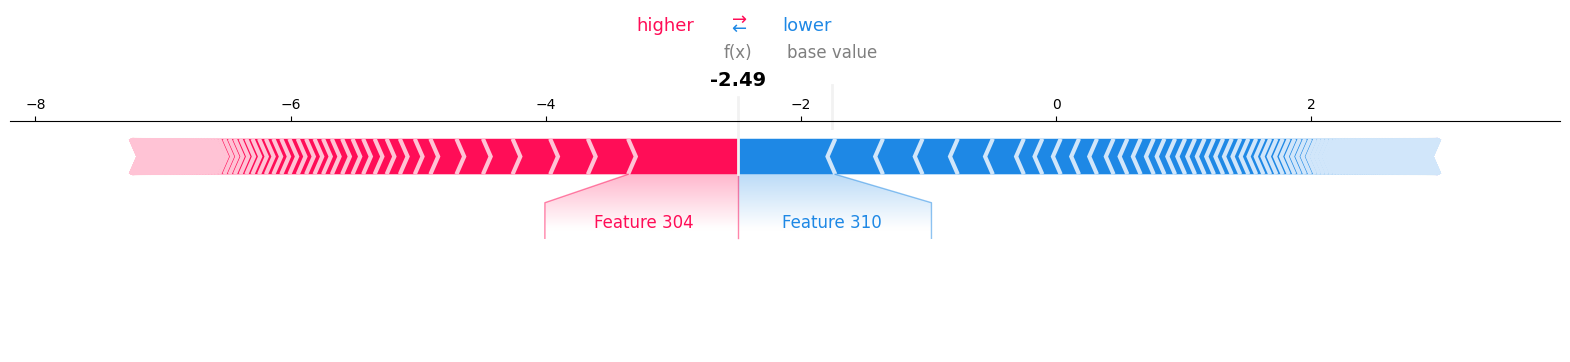


 completed successfully — Sentence-BERT + XGBoost (+ SHAP) ready!


In [ ]:
#  Step 8.4 — Sentence-BERT + XGBoost (+ SHAP Explainability)
from sentence_transformers import SentenceTransformer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# load pretrained Sentence-BERT model
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

#  Encode text data (semantic embeddings)
print("Encoding text using Sentence-BERT ...")
X_train_embed = sbert_model.encode(X_train.tolist(), convert_to_numpy=True, show_progress_bar=True)
X_test_embed = sbert_model.encode(X_test.tolist(), convert_to_numpy=True, show_progress_bar=True)

print("Train embeddings:", X_train_embed.shape)
print("Test embeddings:", X_test_embed.shape)

#  Train XGBoost model on Sentence-BERT embeddings
print("\nTraining XGBoost classifier ...")
sbert_xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    eval_metric='logloss'
)
sbert_xgb.fit(X_train_embed, y_train_enc)

#  Evaluate performance
y_pred_sbert = sbert_xgb.predict(X_test_embed)

print("\n Model Evaluation (Sentence-BERT + XGBoost)")
print("Accuracy:", round(accuracy_score(y_test_enc, y_pred_sbert), 3))
print("\nClassification Report:\n", classification_report(y_test_enc, y_pred_sbert, target_names=le.classes_))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_enc, y_pred_sbert))

# Decode predictions for clarity
y_pred_labels = le.inverse_transform(y_pred_sbert)
y_test_labels = le.inverse_transform(y_test_enc)

results_df = pd.DataFrame({'Actual': y_test_labels, 'Predicted': y_pred_labels, 'Case_Text': X_test.tolist()})
print("\nSample predictions:")
print(results_df.sample(10))

#  SHAP Explainability
print("\n Generating SHAP explainability (this may take a few minutes)...")

# Take subset for SHAP for efficiency
subset_size = 100
X_sample = X_test_embed[:subset_size]

explainer = shap.Explainer(sbert_xgb, X_sample)
shap_values = explainer(X_sample)

# SHAP summary plot (global feature importance)
shap.summary_plot(shap_values, X_sample, show=False)
plt.title("Sentence-BERT + XGBoost — SHAP Summary (Global Importance)")
plt.show()

#  Optional: Force plot for a single prediction
shap.initjs()
sample_idx = 0
shap.force_plot(
    explainer.expected_value,
    shap_values[sample_idx].values,
    matplotlib=True
)

print("\n completed successfully — Sentence-BERT + XGBoost (+ SHAP) ready!")